# Part 1 - Introduction to GeoEnrichment

## Introduction

The Geoenrichment module provides a Python interface for using ArcGIS Business Analyst Geoenrichment to enrich study areas with demographic data, accessing standard geographies and creating reports. Geoenrichemnt provides the ability to access the demographic data provided through Business Analyst. Accessing standard geographies enables retrieving and enriching standard jurisidiciontal areas such as counties, postal (zip) codes or US Census Block Groups in the United States.

### Enriching Study Areas

The Geoenrichment enrich capability adds location intelligence to the data by providing facts about a location or an area. Using GeoEnrichment, you can get information about the people and places in a specific area or within a certain distance or drive time from a location. It enables you to query and use information from a large collection of data sets including population, income, housing, consumer behavior, and the natural environment. 

Enrich through Geoenrichment enables you to answer questions about locations that you can't answer with maps alone. For example, what kind of people live here? What do people like to do in this area? What are their habits and lifestyles?

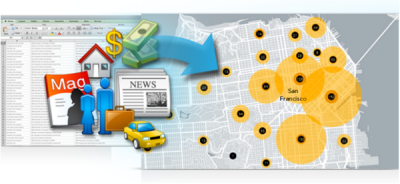

GeoEnrichment makes your analysis more powerful by adding demographic variables in a geographic context. Further, these variables can be accessed at multiple standard geographic resolutions based on the jurisdictional area.

### Geoenrichment Source

Utilizing these capabilities requires either a properly configured Web GIS instance and a login with permissions to utilize these capabilities, or a local installation of [ArcGIS Pro with Business Analyst](https://doc.arcgis.com/en/business-analyst/desktop/introduction-to-esri-business-analyst-desktop-install-guide.htm) and at least one country [data pack installed](https://doc.arcgis.com/en/business-analyst/desktop/installing-business-analyst-data.htm). A properly configured Web GIS instance can be either ArcGIS Online or ArcGIS Enterprise. ArcGIS Enterprise can support Geoenrichment module capabilities by configuring the Geoenrichment utility service to [connect to ArcGIS Online](https://enterprise.arcgis.com/en/portal/latest/administer/windows/configure-services.htm#ESRI_SECTION2_1E0134BF60A049FFB388265B5A6AAE7F) or a fully configured [ArcGIS Business Analyst Enterprise](https://doc.arcgis.com/en/business-analyst/enterprise/latest/windows/business-analyst-enterprise-overview.htm) deployment.

#### Local Geoenrichment Source

If utilizing a local GIS to perform enrichment, you need to have an environment configured with ArcGIS Pro with Business Analyst and at least one local data pack. To specify this local source, you must create an `arcgis.gis.GIS` object instance using the `'pro'` keyword. This tells Geoenrichment to use the locally installed source.

**NOTE:** At the 2.0.1 release, standard geography retrieval and reporting is *not* yet supported with a local source.

In [1]:
from arcgis.gis import GIS

gis_pro = GIS('pro')

#### Web GIS Geoenrichment Source

If using a Web GIS with the Geoenrichment module, you need to create an `arcgis.gis.GIS` object instance connected to the properly configured Web GIS with a user who has permissions to perform enrichment and create reports.

**NOTE:** GeoEnrichment operations using ArcGIS Online consume credits. Credits are the currency used across ArcGIS and are consumed for specific transactions. Learn more about credit consumption for GeoEnrichment [here](https://doc.arcgis.com/en/arcgis-online/administer/credits.htm#ESRI_SECTION1_709121D2C7694DCAB9B8592F36F7A5BA).

In [2]:
import os

from arcgis.gis import GIS

gis_agol = GIS(os.getenv('AGOL_URL'), username=os.getenv('AGOL_USERNAME'), password=os.getenv('AGOL_PASSWORD'))

## Discovering Countries

Since most of the data and also the jurisdictional areas are organized by country, frequently the first step is creating a reference to a country. Even before creating a reference to a country, it is beneficial to discover what countries are available. Please note, using the optional `as_df=True` parameter dramatically speeds up the time to return a result, and also, when working in a Jupyter Notebook environment, provides a much more readable result.

In [148]:
from arcgis.geoenrichment import get_countries

country_df = get_countries(gis_pro, as_df=True)

country_df

,iso2,iso3,name,vintage,country_id,data_source_id
0,CA,CAN,Canada,2021,CAN_ESRI_2021,LOCAL;;CAN_ESRI_2021
1,JP,JPN,Japan,2020,JAPAN2020,LOCAL;;JAPAN2020
2,US,USA,United States,2019,USA_ESRI_2019,LOCAL;;USA_ESRI_2019
4,US,USA,United States,2020,USA_PL_2020,LOCAL;;USA_PL_2020
3,US,USA,United States,2021,USA_ESRI_2021,LOCAL;;USA_ESRI_2021


Next, an `arcgis.geoenrichment.Country` object instance can be created to use for subsequent analysis steps.

In [149]:
from arcgis.geoenrichment import Country

country = Country('usa', gis=gis_pro)

country

<Country - United States 2021 ('local')>

## Enrich Example

To provide context, we can apply a quick example. A large retailer is evaluating potential sites for a new location. This retailer is interested in using key criteria they know are important based on previous experience to evaluate a few candidates. These criteria include competition, traffic, economic feasibility and market potential for the areas surroundinng the potential sites. Utilizing the Geoenrichment module, the real estate site selection team can include demographic variables such as lifestyle, income, spending and education to understand potential customers in the study areas surrounding the candidate sites.

## Discover Demographic Variables

First, we can discover the variables available with the `enrich_variables` property of the `Country` object.

In [151]:
ev = country.enrich_variables

ev

,name,alias,data_collection,enrich_name,enrich_field_name
0,CHILD_CY,2021 Child Population,AgeDependency,AgeDependency.CHILD_CY,AgeDependency_CHILD_CY
1,WORKAGE_CY,2021 Working-Age Population,AgeDependency,AgeDependency.WORKAGE_CY,AgeDependency_WORKAGE_CY
2,SENIOR_CY,2021 Senior Population,AgeDependency,AgeDependency.SENIOR_CY,AgeDependency_SENIOR_CY
3,CHLDDEP_CY,2021 Child Dependency Ratio,AgeDependency,AgeDependency.CHLDDEP_CY,AgeDependency_CHLDDEP_CY
4,AGEDEP_CY,2021 Age Dependency Ratio,AgeDependency,AgeDependency.AGEDEP_CY,AgeDependency_AGEDEP_CY
...,...,...,...,...,...
17958,MOEMEDYRMV,2019 Median Year Householder Moved In MOE (ACS...,yearmovedin,yearmovedin.MOEMEDYRMV,yearmovedin_MOEMEDYRMV
17959,RELMEDYRMV,2019 Median Year Householder Moved In REL (ACS...,yearmovedin,yearmovedin.RELMEDYRMV,yearmovedin_RELMEDYRMV
17960,ACSOWNER,2019 Owner Households (ACS 5-Yr),yearmovedin,yearmovedin.ACSOWNER,yearmovedin_ACSOWNER
17961,MOEOWNER,2019 Owner Households MOE (ACS 5-Yr),yearmovedin,yearmovedin.MOEOWNER,yearmovedin_MOEOWNER


### Finding Variables

This list of economic variables can be filtered using a few useful patterns. First, any variable ending with `CY` is a current year variable, so we can filter to just current year variables using this pattern.

In [152]:
ev[ev.name.str.lower().str.contains('cy')].reset_index()

,index,name,alias,data_collection,enrich_name,enrich_field_name
0,0,CHILD_CY,2021 Child Population,AgeDependency,AgeDependency.CHILD_CY,AgeDependency_CHILD_CY
1,1,WORKAGE_CY,2021 Working-Age Population,AgeDependency,AgeDependency.WORKAGE_CY,AgeDependency_WORKAGE_CY
2,2,SENIOR_CY,2021 Senior Population,AgeDependency,AgeDependency.SENIOR_CY,AgeDependency_SENIOR_CY
3,3,CHLDDEP_CY,2021 Child Dependency Ratio,AgeDependency,AgeDependency.CHLDDEP_CY,AgeDependency_CHLDDEP_CY
4,4,AGEDEP_CY,2021 Age Dependency Ratio,AgeDependency,AgeDependency.AGEDEP_CY,AgeDependency_AGEDEP_CY
...,...,...,...,...,...,...
1623,17847,VAL1M_CY,2021 Home Value $1 Million-1499999,Wealth,Wealth.VAL1M_CY,Wealth_VAL1M_CY
1624,17848,MEDVAL_CY,2021 Median Home Value,Wealth,Wealth.MEDVAL_CY,Wealth_MEDVAL_CY
1625,17849,AVGVAL_CY,2021 Average Home Value,Wealth,Wealth.AVGVAL_CY,Wealth_AVGVAL_CY
1626,17850,VALBASE_CY,2021 Home Value Base,Wealth,Wealth.VALBASE_CY,Wealth_VALBASE_CY


Because we are workign with a data frame, we can easily filter by key words in the description. Here, we are searching for a metric representing relative diversity. We quickly discover there is a variable available, the 2021 Diversity Index, we can use. Also, although there are three rows displayed below, this is because the variable is included in three Data Collections.

Data Collections are groupings of variables. Frequently these groupings can dramatically speed up analysis by offering a selection of variables to use for quickly getting started doing analysis.

In [154]:
ev[
    (ev.name.str.lower().str.contains('cy'))
    & (ev.alias.str.lower().str.contains('diversity'))
].reset_index(drop=True)

,name,alias,data_collection,enrich_name,enrich_field_name
0,DIVINDX_CY,2021 Diversity Index,Policy,Policy.DIVINDX_CY,Policy_DIVINDX_CY
1,DIVINDX_CY,2021 Diversity Index,KeyUSFacts,KeyUSFacts.DIVINDX_CY,KeyUSFacts_DIVINDX_CY
2,DIVINDX_CY,2021 Diversity Index,raceandhispanicorigin,raceandhispanicorigin.DIVINDX_CY,raceandhispanicorigin_DIVINDX_CY


Using a bit of exploration using the methods detailed above, we can select a few variables to use for analysis.

In [155]:
analysis_variables = [
    'TOTPOP_CY',  # Population: Total Population (Esri)
    'DIVINDX_CY', # Diversity Index (Esri)
    'AVGHHSZ_CY', # Average Household Size (Esri)
    'MEDAGE_CY',  # Age: Median Age (Esri)
    'MEDHINC_CY', # Income: Median Household Income (Esri)
    'BACHDEG_CY', # Education: Bachelor's Degree (Esri)
]

analysis_variables

['TOTPOP_CY',
 'DIVINDX_CY',
 'AVGHHSZ_CY',
 'MEDAGE_CY',
 'MEDHINC_CY',
 'BACHDEG_CY']

### Load Data

Next, we can load the study areas surrounding each location from a Python pickle file. The enrich capability in Business Analyst requires polygon areas to use for [apportioning demographic data](https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm) to the input geographies. The polygons delineating the area to be used for apportioning selected demographic data to each location, these are referred to as *study areas*. While, for this example, we already have study areas created, it is possible to specify parameters for study areas for the enrich tool. This is demostrated in a later example.

In [156]:
from arcgis.features import GeoAccessor  # adds "spatial" namespace to Pandas DataFrame object
import pandas as pd

candidate_df = pd.read_pickle('../data/health_drivetime_8min.pkl')
candidate_df.spatial.set_geometry('SHAPE')

candidate_df

,loc_id,bed_count,address,SHAPE
0,Facility 1,156,"2468 S St Andrews Pl, Los Angeles, CA, 90018","{""rings"": [[[-118.30915356799994, 34.074037262..."
1,Facility 2,59,"2300 W Washington Blvd, Los Angeles, CA, 90018","{""rings"": [[[-118.30915356799994, 34.082122063..."
2,Facility 4,49,"6070 W Pico Blvd, Los Angeles, CA, 90035","{""rings"": [[[-118.37630232799995, 34.090880596..."
3,Facility 5,55,"1480 S La Cienega Blvd, Los Angeles, CA, 90035","{""rings"": [[[-118.37630232799995, 34.091105174..."
4,Facility 3,25,"4060 Whittier Blvd, Los Angeles, CA, 90023","{""rings"": [[[-118.15397031299995, 34.077855084..."


### Enrich

Finally, we can run the `enrich` method to get data about the study areas using the enrich variables selected above.

In [157]:
enrich_df = country.enrich(candidate_df, enrich_variables=analysis_variables)

enrich_df.info()
enrich_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   loc_id              5 non-null      object  
 1   bed_count           5 non-null      float64 
 2   address             5 non-null      object  
 3   has_data            5 non-null      int32   
 4   aggregation_method  5 non-null      object  
 5   medage_cy           5 non-null      float64 
 6   medhinc_cy          5 non-null      float64 
 7   totpop_cy           5 non-null      float64 
 8   avghhsz_cy          5 non-null      float64 
 9   divindx_cy          5 non-null      float64 
 10  bachdeg_cy          5 non-null      float64 
 11  SHAPE               5 non-null      geometry
dtypes: float64(7), geometry(1), int32(1), object(3)
memory usage: 588.0+ bytes


,loc_id,bed_count,address,has_data,aggregation_method,medage_cy,medhinc_cy,totpop_cy,avghhsz_cy,divindx_cy,bachdeg_cy,SHAPE
0,Facility 1,156.0,"2468 S St Andrews Pl, Los Angeles, CA, 90018",1,BlockApportionment:US.BlockGroups;PointsLayer:...,33.7,43872.0,451435.0,2.84,92.9,56626.0,"{""rings"": [[[-118.30915356799994, 34.074037262..."
1,Facility 2,59.0,"2300 W Washington Blvd, Los Angeles, CA, 90018",1,BlockApportionment:US.BlockGroups;PointsLayer:...,34.3,46575.0,466631.0,2.75,92.6,66742.0,"{""rings"": [[[-118.30915356799994, 34.082122063..."
2,Facility 4,49.0,"6070 W Pico Blvd, Los Angeles, CA, 90035",1,BlockApportionment:US.BlockGroups;PointsLayer:...,38.2,82583.0,227913.0,2.30,81.6,55928.0,"{""rings"": [[[-118.37630232799995, 34.090880596..."
3,Facility 5,55.0,"1480 S La Cienega Blvd, Los Angeles, CA, 90035",1,BlockApportionment:US.BlockGroups;PointsLayer:...,38.3,83748.0,224339.0,2.26,80.9,55710.0,"{""rings"": [[[-118.37630232799995, 34.091105174..."
4,Facility 3,25.0,"4060 Whittier Blvd, Los Angeles, CA, 90023",1,BlockApportionment:US.BlockGroups;PointsLayer:...,31.2,50165.0,242590.0,3.83,80.3,15185.0,"{""rings"": [[[-118.15397031299995, 34.077855084..."


The response includes a lot of useful metadata related to how the enrichment was performed. However, if we are only interested in the actual demographic columns added, we can filter to just these using the available enrich variable names.

In [158]:
# get just the enrich columns
enrich_cols = [c for c in enrich_df if c in ev.name.str.lower().values]

# combine the enrich columns with a few others we want to keep
keep_cols = ['loc_id'] + enrich_cols + ['SHAPE']

# filter the enrich data frame to just these columns
enrich_df = enrich_df.loc[:,keep_cols].set_index('loc_id')

# re-enable spatial awareness
enrich_df.spatial.set_geometry('SHAPE')

enrich_df.info()
enrich_df

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Facility 1 to Facility 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   medage_cy   5 non-null      float64 
 1   medhinc_cy  5 non-null      float64 
 2   totpop_cy   5 non-null      float64 
 3   avghhsz_cy  5 non-null      float64 
 4   divindx_cy  5 non-null      float64 
 5   bachdeg_cy  5 non-null      float64 
 6   SHAPE       5 non-null      geometry
dtypes: float64(6), geometry(1)
memory usage: 320.0+ bytes


,medage_cy,medhinc_cy,totpop_cy,avghhsz_cy,divindx_cy,bachdeg_cy,SHAPE
loc_id,,,,,,,
Facility 1,33.7,43872.0,451435.0,2.84,92.9,56626.0,"{""rings"": [[[-118.30915356799994, 34.074037262..."
Facility 2,34.3,46575.0,466631.0,2.75,92.6,66742.0,"{""rings"": [[[-118.30915356799994, 34.082122063..."
Facility 4,38.2,82583.0,227913.0,2.30,81.6,55928.0,"{""rings"": [[[-118.37630232799995, 34.090880596..."
Facility 5,38.3,83748.0,224339.0,2.26,80.9,55710.0,"{""rings"": [[[-118.37630232799995, 34.091105174..."
Facility 3,31.2,50165.0,242590.0,3.83,80.3,15185.0,"{""rings"": [[[-118.15397031299995, 34.077855084..."


## Evaluate Results

While a multitude of quantitative methods exist, frequently an extremely effective starting point for analysis is simply visualizing the results. Here, we are using `matplotlib` to visualize the differencees between the locations based on the enriched data.

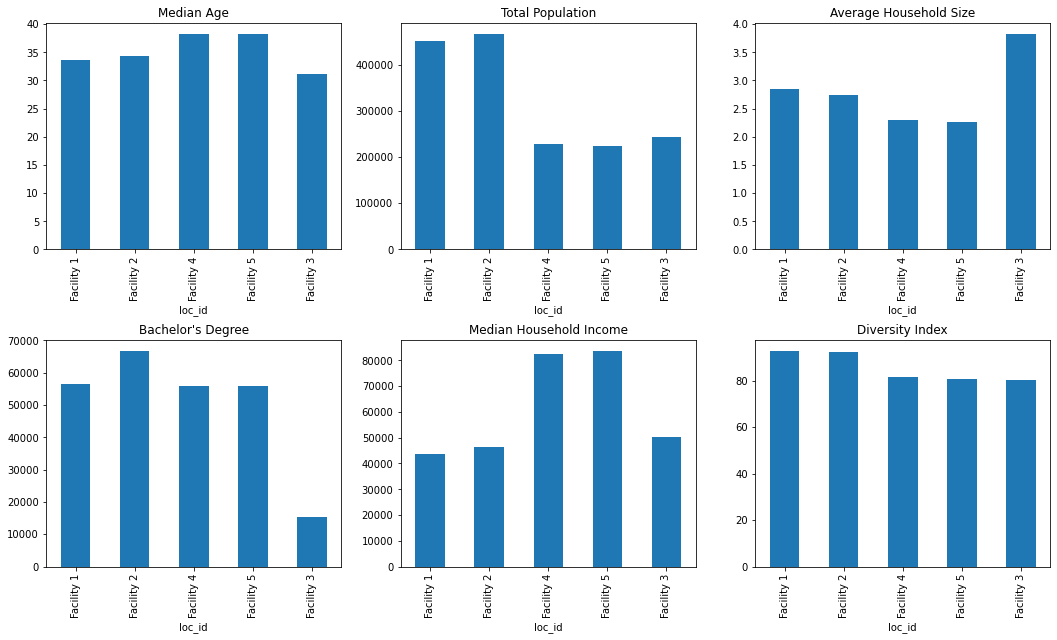

In [159]:
import matplotlib.pyplot as plt

# this is due to a deprication warning inside matplotlib
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(2, 3)
fig.set_figheight(10.0)
fig.set_figwidth(18.0)
fig.subplots_adjust(hspace=0.4)

plt.sca(axs[0, 0])
_ = enrich_df.medage_cy.plot(title='Median Age', kind='bar')

plt.sca(axs[0, 1])
_ = enrich_df.totpop_cy.plot(title='Total Population', kind='bar')

plt.sca(axs[0, 2])
_ = enrich_df.avghhsz_cy.plot(title='Average Household Size', kind='bar')

plt.sca(axs[1, 0])
_ = enrich_df.bachdeg_cy.plot(title="Bachelor's Degree", kind='bar')

plt.sca(axs[1, 1])
_ = enrich_df.medhinc_cy.plot(title="Median Household Income", kind='bar')

plt.sca(axs[1, 2])
_ = enrich_df.divindx_cy.plot(title="Diversity Index", kind='bar')

Facility 1 and facility 2 have higher populations, and are diverse with less income. Facility 3 is far younger with larger households, less education and have lower incomes. Facility 4 and facility 5 are older, more educated and have a higher income.

If interested in opening a discount department store, facility 2 likely is the most attractive location since there are more people who are looking for good value. Facility 1 is a close second for the same reasons.

If interested in opeing a quick service restaurant, facility 3 may be the best option to meet the needs of a young, busy and price conscious population.

Obviously, depending on the key characteristics of the business looking for a new location, the key demographic indicators will be different. Using geoenrichment paired with the Python API enables extremley quick access to thousands of demographic variables for informed decision making.